In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from collections import Counter

In [2]:
df = pd.read_csv('python/challenge.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,y,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,Unnamed: 27,Unnamed: 28
0,id61539,7.1.1,asus_ASUS_X00HD,FR,0,1997,0.0,21,0,1,...,0,0,0,1,FALSE,NaN,NaN,NaN,NaN,NaN
1,id131313,7,samsung_SM-A310F,DK,0,1999,0.0,19,0,2,...,0,0,0,0,FALSE,NaN,NaN,NaN,NaN,NaN
2,id57636,8.0.0,samsung_SM-G935F,SE,2,1996,0.0,22,0,1,...,0,0,1,0,TRUE,NaN,NaN,NaN,NaN,NaN


In [3]:
df.keys()

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   x1           10000 non-null  object 
 1   x2           10000 non-null  object 
 2   x3           10000 non-null  object 
 3   x4           10000 non-null  object 
 4   x5           10000 non-null  object 
 5   x6           10000 non-null  int64  
 6   y            10000 non-null  float64
 7   x7           10000 non-null  int64  
 8   x8           10000 non-null  object 
 9   x9           10000 non-null  int64  
 10  x10          10000 non-null  int64  
 11  x11          10000 non-null  float64
 12  x12          10000 non-null  float64
 13  x13          10000 non-null  float64
 14  x14          10000 non-null  int64  
 15  x15          10000 non-null  object 
 16  x16          10000 non-null  object 
 17  x17          10000 non-null  object 
 18  x18          10000 non-null  int64  
 19  x19  

In [5]:
keys = df.select_dtypes('O').columns
print(keys)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x15', 'x16', 'x17', 'x23', 'x24',
       'x25', 'x26', 'Unnamed: 27'],
      dtype='object')


In [6]:
df.describe()

,x6,y,x7,x9,x10,x11,x12,x13,x14,x18,x19,x20,x21,x22,Unnamed: 28
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.0
mean,1989.585900,0.427953,28.212400,2.400900,0.722100,0.027339,0.165077,0.055035,74.486500,0.037900,0.020500,0.350800,0.540200,0.041300,3.0
std,22.920972,20.726503,11.398424,2.319335,0.844596,0.034747,0.111654,0.369048,49.218869,0.190964,0.155827,0.477244,0.498406,0.198993,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,1984.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.080720,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,1993.000000,0.000000,25.000000,2.000000,1.000000,0.018692,0.144578,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.0
75%,1998.000000,0.000000,34.000000,3.000000,1.000000,0.041096,0.226441,0.000000,93.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.0
max,2006.000000,2000.000000,100.000000,26.000000,4.000000,1.000000,1.000000,7.000000,976.000000,1.000000,7.000000,1.000000,1.000000,1.000000,3.0


In [7]:
df.corr(method='pearson').style.format('{:.2}').background_gradient(cmap='coolwarm')

C:\Users\Penelope\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Penelope\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,x6,y,x7,x9,x10,x11,x12,x13,x14,x18,x19,x20,x21,x22,Unnamed: 28
x6,1.0,-0.84,-0.48,-0.034,-0.013,-0.35,0.0076,0.013,-0.0044,-0.022,-0.36,-0.16,0.028,-0.0082,nan
y,-0.84,1.0,-0.021,-0.0064,0.013,0.27,-0.014,0.0065,-0.012,0.047,0.43,-0.004,-0.01,0.044,nan
x7,-0.48,-0.021,1.0,0.087,-0.00083,0.2,0.011,-0.041,0.036,-0.045,-0.063,0.34,-0.038,-0.069,nan
x9,-0.034,-0.0064,0.087,1.0,0.29,0.088,0.47,0.032,0.46,0.023,0.031,0.081,0.19,-0.011,nan
x10,-0.013,0.013,-0.00083,0.29,1.0,0.15,-0.065,-0.048,0.35,-0.028,0.0091,0.075,0.21,-0.065,nan
x11,-0.35,0.27,0.2,0.088,0.15,1.0,-0.11,-0.056,0.18,-0.04,0.091,0.25,0.15,0.017,nan
x12,0.0076,-0.014,0.011,0.47,-0.065,-0.11,1.0,0.081,0.071,0.048,0.053,0.015,-0.02,-0.035,nan
x13,0.013,0.0065,-0.041,0.032,-0.048,-0.056,0.081,1.0,0.018,0.75,0.55,-0.0063,-0.047,-0.0032,nan
x14,-0.0044,-0.012,0.036,0.46,0.35,0.18,0.071,0.018,1.0,0.074,0.066,0.049,0.33,-0.031,nan
x18,-0.022,0.047,-0.045,0.023,-0.028,-0.04,0.048,0.75,0.074,1.0,0.64,-0.061,-0.021,0.0088,nan


Check y now

In [8]:
# check how many group for each categorical parameter
for k in df.select_dtypes('O').columns:
    print('== == ++ == == ++ == == ')
    print(k, len(df[k].unique()))
    print(df[k].value_counts()) #X15, X16, X17, X23, X27

== == ++ == == ++ == == 
x1 10000
id61539     1
id21209     1
id341       1
id106009    1
id13840     1
           ..
id45319     1
id106558    1
id95974     1
id91590     1
id2857      1
Name: x1, Length: 10000, dtype: int64
== == ++ == == ++ == == 
x2 18
8.0.0    3454
7        1729
8.1.0    1474
7.1.1     931
6.0.1     905
9         474
7.1.2     309
5.1.1     295
6         207
4.4.2      61
5.1        55
5          37
5.0.1      28
5.0.2      26
4.4.4      12
4.4         1
7.1         1
4.4.3       1
Name: x2, dtype: int64
== == ++ == == ++ == == 
x3 1320
samsung_SM-G950F    217
samsung_SM-G960U    207
samsung_SM-G950U    192
samsung_SM-G965U    143
samsung_SM-N960U    140
                   ... 
meizu_M5c             1
ZTE_Z815              1
TCL_7071D             1
samsung_C46B2H        1
motorola_XT1049       1
Name: x3, Length: 1320, dtype: int64
== == ++ == == ++ == == 
x4 58
US                  5765
GB                   870
CA                   687
FR                   411
SG 

In [36]:
X = df.copy().drop(['y', 'x3', 'x1', 'x6','Unnamed: 28'], 1) #id, year of birth, x3 = x15
y = np.where(df['y'] >0 ,1,0)

C:\Users\Penelope\AppData\Local\Temp/ipykernel_1036/1902634796.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.copy().drop(['y', 'x3', 'x1', 'x6','Unnamed: 28'], 1) #id, year of birth, x3 = x15


In [37]:
change_type = []
keys = X.select_dtypes('O').columns
for k in keys:
    X[k] = X[k].astype('string')
    X[k] = X[k].fillna('').str.lower()
X = pd.get_dummies(X, columns=keys)
X.head(3)

,x7,x9,x10,x11,x12,x13,x14,x18,x19,x20,...,x26_starbucks,x26_tapjoy,x26_unity,x26_wwe,x26_yahtzee,x26_yeahmobi,x26_youtube contest,Unnamed: 27_,Unnamed: 27_2,Unnamed: 27_fluent
0,21,1,0,0.000000,0.036145,0.0,83,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,19,2,0,0.000000,0.529412,0.0,102,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,22,1,0,0.031915,0.063830,0.0,94,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# apparently lower them will improve AUC
X['x7'] = X['x7']/100
X['x9'] = X['x9']/10

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def metrics(y_true, y_pred, y_pred_p):
    print(classification_report(y_true, y_predicted))

def train(Xtrain, target, model):
    model.fit(Xtrain, target)
    y_pred = model.predict(Xtest)
    y_pred_p = model.predict_proba(Xtest)[:,1]
    print(roc_auc_score(y_pred, ytest))
    return model, y_pred, y_pred_p
    
    
def train_cv(Xtriain, target, model, cv=None):
    scores = []
    cv = cv if cv is not None else StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
    for ind_train, ind_valid in cv.split(Xtrain, target):
        Xt,yt = Xtrain.iloc[ind_train], target[ind_train]
        Xv, yv = Xtrain.iloc[ind_valid], target[ind_valid]
        
        model.fit(Xt, yt)
        y_pred = model.predict(Xv)
        y_pred_p = model.predict_proba(Xv)[:,1]
        
        scores.append(roc_auc_score(yv, y_pred_p))
        print(classification_report(yv, y_pred))
        
        print('AUC:', scores)
    return model

In [41]:
from xgboost import XGBClassifier

scale_pos_weight = np.sum(y==0)/ np.sum(y==1)
model = XGBClassifier(n_jobs=-1, random_state=0, scale_pos_weight=scale_pos_weight)

model, y_pred, y_pred_p = train(Xtrain, ytrain, model)
print('normal_train')
print('===')
print(y_pred)
#model = train_cv(Xtrain, ytrain, model)


C:\Users\Penelope\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4921796165489405
normal_train
===
[0 0 0 ... 1 0 0]


In [ ]:
#AUC: [0.6315936507936508, 0.5309206349206349, 0.5010285714285714, 0.49930158730158736, 0.6947023751343955

Index(['x12', 'x14', 'x11', 'x7', 'x9', 'x10', 'x4_us', 'x24_', 'x15_samsung',
       'x24_komistplay-i27ca6ba3e32c55c',
       ...
       'x24_568854315415129371', 'x24_568854641757307119',
       'x24_574249797825982883', 'x24_komistplay-i27d3c670e53e92c',
       'x24_574253038517356133', 'x15_asus', 'x24_komistplay-i27abe6a50fb8529',
       'x24_komistplay-i273dcf86faab892', 'x24_578596649534875174', 'x17_4'],
      dtype='object', length=117)


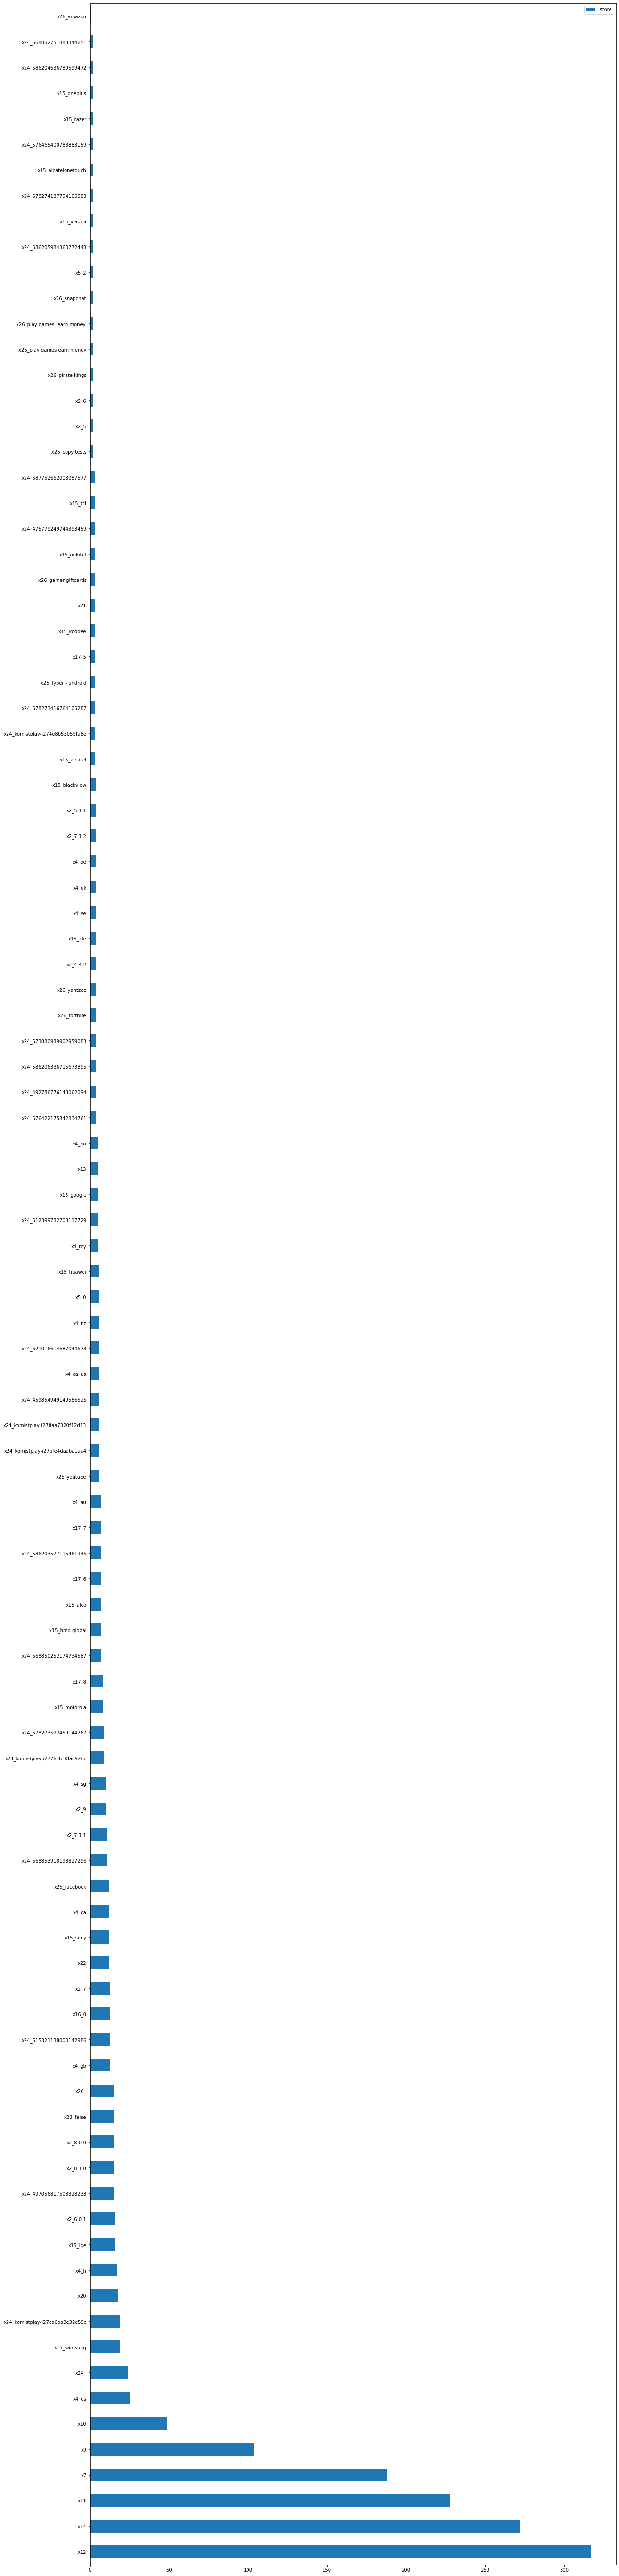

In [44]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(100, columns="score").plot(kind='barh', figsize = (20,100))
print(data['score'].index)

In [21]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, Xtest, ytest)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

KeyboardInterrupt: 

In [112]:
import pickle
with open(r'python\xgb.pkl', 'rb') as f:
    mm = pickle.load(f)
import pickle
with open(r'python\xgb.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)
    

In [119]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=65.66666666666667,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [117]:
model.predict(Xtrain.loc[[20]])

array([0])

In [131]:
ll = [[2],[3], [4]]
print(np.reshape(ll,(-1)).squeeze())

[2 3 4]
